In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('bitstampUSD.csv')
df.shape  # 4.8 million rows
df = df.dropna()  # 3.6 million rows left
import matplotlib.pyplot as plt
import math

df['Time'] = pd.to_datetime(df['Timestamp'],unit='s')

# Select date range (most recent 1,000,000 points)

start_date = '2019-04-27 12:31:00'  # 2613769 Unix  --> Sat April 27 2019 12:31:00 EDT
end_date = '2021-03-31 20:00:00'  # 1617148800 Unix --> Wed March 31 2021 20:00:00 EDT
mask = (df['Time'] >= start_date) & (df['Time'] <= end_date)
df = df.loc[mask]
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Time
3844367,1556368260,5156.74,5156.74,5156.74,5156.74,0.056878,293.305058,5156.740000,2019-04-27 12:31:00
3844368,1556368320,5155.53,5155.53,5155.53,5155.53,0.036407,187.698412,5155.530000,2019-04-27 12:32:00
3844369,1556368380,5152.73,5152.73,5150.49,5150.49,0.104540,538.651135,5152.574173,2019-04-27 12:33:00
3844370,1556368440,5150.49,5150.49,5150.49,5150.49,0.061644,317.494951,5150.490000,2019-04-27 12:34:00
3844371,1556368500,5155.36,5155.36,5155.36,5155.36,0.002133,10.996383,5155.360000,2019-04-27 12:35:00
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00


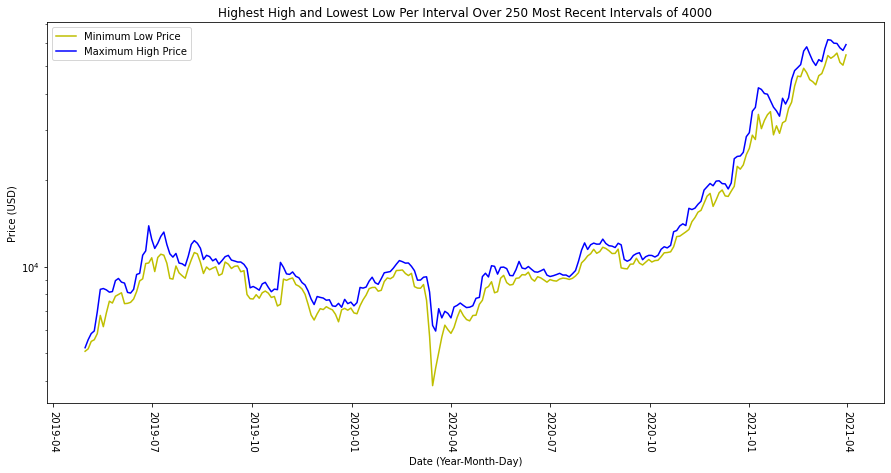

In [10]:
# for each interval, graph the highest high and lowest low
# for each interval, graph first Open and last Close
# for each interval, graph the sum of the volumes

# data is the last (most recent) 1,000,000 points.

# [num_intervals] intervals of size [int_size]
# Size of each interval is adjustable
int_size = 4000
num_intervals = int(df.shape[0]/int_size)

max_high = [0] * num_intervals
min_low = [0] * num_intervals
time = [0] * num_intervals

for i in range(num_intervals):
    interval_h = df['High'].iloc[i*int_size:(int_size*i)+int_size]
    interval_l = df['Low'].iloc[i*int_size:(int_size*i)+int_size]
    max_high[i] = interval_h.max()
    min_low[i] = interval_l.min()
    time[i] = df['Time'].iloc[(int_size*i)+int_size-1:(int_size*i)+int_size] # use last timestamp on interval

plt.figure(figsize = (15,7))

plt.plot(time, min_low, 'y-', label='Minimum Low Price')
plt.plot(time,max_high, 'b-', label='Maximum High Price')

plt.xlabel('Date (Year-Month-Day)')
plt.ylabel('Price (USD)'),
plt.title(f'Highest High and Lowest Low Per Interval Over {num_intervals} Most Recent Intervals of {int_size}')
plt.yscale('log')
plt.xticks(rotation = 270)
plt.legend(loc='upper left')


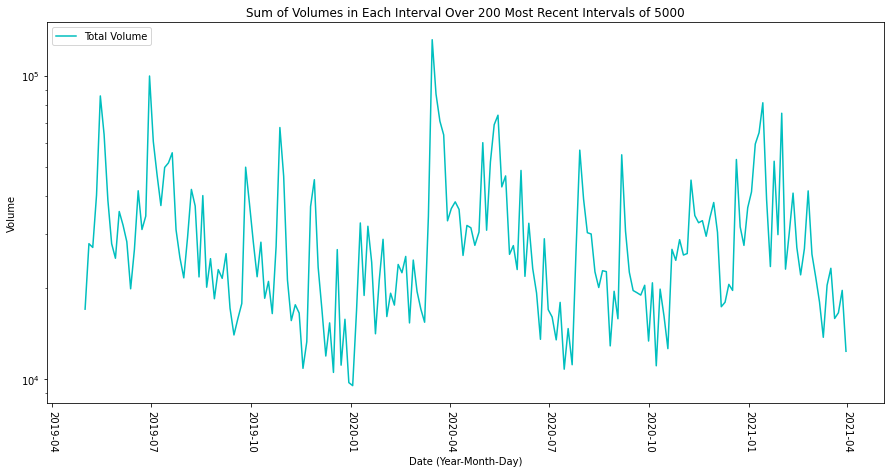

In [3]:
# SUM OF VOLUMES AKA TOTAL VOLUME

# Size of each interval is adjustable
int_size = 5000

num_intervals = int(df.shape[0]/int_size)
sum_volumes = [0] * num_intervals
time = [0] * num_intervals

for i in range(num_intervals):
    interval = df['Volume_(BTC)'].iloc[i*int_size:(int_size*i)+int_size]
    sum_volumes[i] = math.fsum(interval)
    time[i] = df['Time'].iloc[(int_size*i)+int_size-1:(int_size*i)+int_size]

plt.figure(figsize = (15,7))

plt.plot(time, sum_volumes, 'c-', label='Total Volume')

plt.xlabel('Date (Year-Month-Day)')
plt.ylabel('Volume'),
plt.title(f'Sum of Volumes in Each Interval Over {num_intervals} Most Recent Intervals of {int_size}')
plt.yscale('log')
plt.xticks(rotation = 270)
plt.legend(loc='upper left')

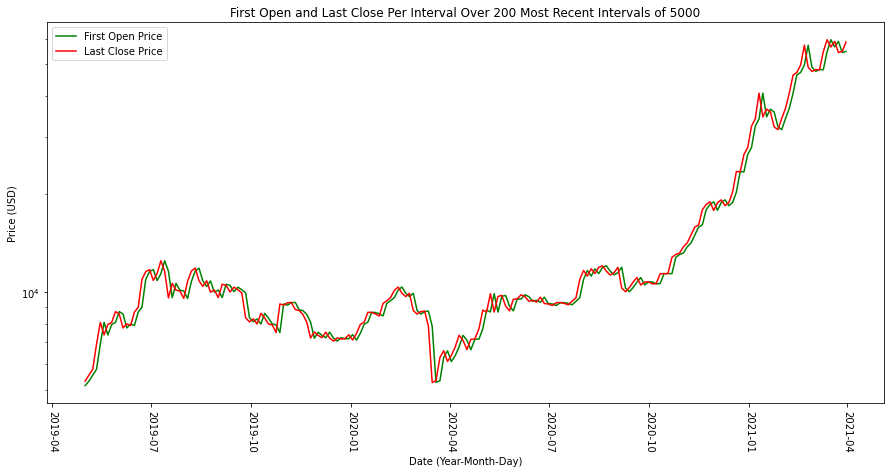

In [4]:
# FIRST OPEN AND LAST CLOSE

# Size of each interval is adjustable
int_size = 5000

num_intervals = int(df.shape[0]/int_size)
first_open = [0] * num_intervals
last_close = [0] * num_intervals
time = [0] * num_intervals

for i in range(num_intervals):
    first_open[i] = df['Open'].iloc[i*int_size:i*int_size+1] 
    last_close[i] = df['Close'].iloc[(int_size*i)+int_size-1:(int_size*i)+int_size]
    time[i] = df['Time'].iloc[(int_size*i)+int_size-1:(int_size*i)+int_size]
    
plt.figure(figsize = (15,7))

plt.plot(time, first_open, 'g-', label='First Open Price')
plt.plot(time, last_close, 'r-', label='Last Close Price')

plt.xlabel('Date (Year-Month-Day)')
plt.ylabel('Price (USD)'),
plt.title(f'First Open and Last Close Per Interval Over {num_intervals} Most Recent Intervals of {int_size}')
plt.yscale('log')
plt.xticks(rotation = 270)
plt.legend(loc='upper left')

In [11]:
# CONFIRM THERE ARE NO MISSING VALUES

df = df.dropna()
df['Timestamp']
# Index 3844367 to 4857376 (1013009 values)
# Timestamp 1556368260 to 1617148800 ((last - first) / 60 = 1013009 minutes)
# This means every minute is accounted for. There are no missing values

3844367    1556368260
3844368    1556368320
3844369    1556368380
3844370    1556368440
3844371    1556368500
              ...    
4857372    1617148560
4857373    1617148620
4857374    1617148680
4857375    1617148740
4857376    1617148800
Name: Timestamp, Length: 1000227, dtype: int64

In [50]:
# HOURLY DATA AND DAILY DATA

# look at first and last day. if they arent complete day, just drop the day
# max high and min low from hour
# first open and last close
# NOT A GRAPH. JUST MANIPULATE DATA. make a new data frame

# First timestamp in my data is in the middle of April 27th. Drop 4/27. First day in new df will be 4/28.
# First timestamp of April 28th is 1556409600 (4/28/19 at 12:00:00AM GMT)

# Last timestamp is 1617148800 (3/31/21 at 12:00:00AM GMT)
# As long as I stay in GMT there is no need to drop the last day.

df.dropna()
df['Time'] = pd.to_datetime(df['Timestamp'],unit='s')

# New date range

start_date = '2019-04-28 00:00:00'  # 1556409600 Unix  --> April 28 2019 12:00:00 AM GMT
end_date = '2021-03-31 00:00:00'  # 1617148800 Unix --> March 31 2021 12:00:00 AM GMT
mask = (df['Time'] >= start_date) & (df['Time'] <= end_date)
df = df.loc[mask]
df # Correct indexes, all minutes accounted for, but wrong number of rows??
# num rows is 999575 but when you subtract last index - first index you don't get that?
# Lindex - Findex = 1012320
# num rows = 999575
# 1012320 - 999575 = 12745 Why??? Number of rows should be the same as num of indexes
# because there are no missing values because all minutes are accounted for... num minutes is the same
# as num indexes

total_secs = 1617148800 - 1556409600 # 60739200 secs
total_hours = int(total_secs/60/60) # 16872 hrs -- confirmed on online duration calculator

# Make empty lists that will eventually become columns when dataframe is initialized at the end
max_high = [0] * total_hours
min_low = [0] * total_hours
first_open = [0] * total_hours
last_close = [0] * total_hours
    

for i in range(total_hours):
    interval_h = df['High'].iloc[i*60:(60*i)+60]
    interval_l = df['Low'].iloc[i*60:(60*i)+60]
    max_high[i] = interval_h.max()
    min_low[i] = interval_l.min()
    first_open[i] = df['Open'].iloc[i*60:i*60+1] 
    last_close[i] = df['Close'].iloc[(60*i)+60-1:(60*i)+60]

hourly_data = pd.DataFrame({'Max High': max_high, 'Min Low': min_low, 'First Open': first_open,
                           'Last Close': last_close})
hourly_data # 16872 rows, 4 columns

# Why are the NaNs at the end??
hourly_data.iloc[16657:]

,Max High,Min Low,First Open,Last Close
16657,58941.34,58596.07,"4857220 58645.05 Name: Open, dtype: float64","4857279 58871.28 Name: Close, dtype: float64"
16658,58895.04,58567.11,"4857280 58866.08 Name: Open, dtype: float64","4857339 58631.35 Name: Close, dtype: float64"
16659,58778.18,58599.78,"4857341 58633.33 Name: Open, dtype: float64","Series([], Name: Close, dtype: float64)"
16660,NaN,NaN,"Series([], Name: Open, dtype: float64)","Series([], Name: Close, dtype: float64)"
16661,NaN,NaN,"Series([], Name: Open, dtype: float64)","Series([], Name: Close, dtype: float64)"
...,...,...,...,...
16867,NaN,NaN,"Series([], Name: Open, dtype: float64)","Series([], Name: Close, dtype: float64)"
16868,NaN,NaN,"Series([], Name: Open, dtype: float64)","Series([], Name: Close, dtype: float64)"
16869,NaN,NaN,"Series([], Name: Open, dtype: float64)","Series([], Name: Close, dtype: float64)"
16870,NaN,NaN,"Series([], Name: Open, dtype: float64)","Series([], Name: Close, dtype: float64)"


In [ ]:
# Moving Average
# use for loops then compare with rolling mean function to check
#price_mavg = df['Weighted_Price'].rolling(window=100).mean()